<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Performance Python

## Loops

### Python

In [1]:
import random

In [2]:
def average_py(n):
    s = 0  
    for i in range(n):
        s += random.random()  
    return s / n  

In [3]:
n = 10000000  

In [4]:
%time average_py(n)  

Wall time: 1.74 s


0.49995508832296487

In [5]:
%timeit average_py(n)  

1.36 s ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%time sum([random.random() for _ in range(n)]) / n  
# Uses a list comprehension instead of the function.

Wall time: 1.87 s


0.5000334720693849

### NumPy 
* The strength of Numpy lies in its vectorization capabilities.

In [17]:
import numpy as np

In [5]:
def average_np(n):
    s = np.random.random(n)  
    return s.mean()  

In [6]:
%time average_np(n)

Wall time: 192 ms


0.4998929756400063

In [10]:
%timeit average_np(n)

141 ms ± 3.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
s = np.random.random(n)
s.nbytes  # The price that must be paid is significantly higher memory usage.

80000000

### Numba
* Numba is a package that allows the dynamic compiling of pure Python code by the use of LLVM.
* if a code is numerically orientated (does a lot of math), use Numpy a lot and/or has a lot of loops, then Numba is often a good choice.
* The combination of pure Python with Numba beats the Numpy version and preserves the memory efficiency of the original loop-based implementation.
* conda install numba

In [22]:
import numba

In [8]:
# The dynamically compiled function average_nb() can be called directly from Python.

average_nb = numba.jit(average_py)  

In [15]:
numba.jit?

In [9]:
%time average_nb(n)  # The compiling happens during runtime, leading to some overhead

Wall time: 882 ms


0.4998945492315135

In [15]:
%time average_nb(n)  

Wall time: 104 ms


0.5000736607890872

In [16]:
%timeit average_nb(n)  

94.5 ms ± 7.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Cython

* Cython allows one to statically compile Python code.
* However, the application is not as simple as with Numba since the code generally needs to be changed to see significant speed improvements.

In [10]:
import cython

In [30]:
%load_ext Cython

In [24]:
%%cython --verbose
cimport cython
import random  
def average_cy0(n):  
    s = 0
    for i in range(n):
        s += random.random()
    return s / n

[1/1] Cythonizing C:\Users\Jeffery\.ipython\cython\_cython_magic_0aa957a878429b38b2e3fab78cc17128.pyx
building '_cython_magic_0aa957a878429b38b2e3fab78cc17128' extension
C:\Program Files (x86)\mingw-w64\i686-8.1.0-posix-dwarf-rt_v6-rev0\mingw32\bin\gcc.exe -mdll -O -Wall -DMS_WIN64 -IC:\Programs\Anaconda\include -IC:\Programs\Anaconda\include -c C:\Users\Jeffery\.ipython\cython\_cython_magic_0aa957a878429b38b2e3fab78cc17128.c -o c:\users\jeffery\.ipython\cython\_cython_magic_0aa957a878429b38b2e3fab78cc17128.o


In [12]:
%%cython -a --verbose
cimport cython
import random  
def average_cy0(n):  
    s = 0
    for i in range(n):
        s += random.random()
    return s / n

[1/1] Cythonizing C:\Users\Jeffery\.ipython\cython\_cython_magic_92ac2b51e63a21facc25bd7032c394c5.pyx
building '_cython_magic_92ac2b51e63a21facc25bd7032c394c5' extension
C:\Program Files (x86)\mingw-w64\i686-8.1.0-posix-dwarf-rt_v6-rev0\mingw32\bin\gcc.exe -mdll -O -Wall -DMS_WIN64 -IC:\Programs\Anaconda\include -IC:\Programs\Anaconda\include -c C:\Users\Jeffery\.ipython\cython\_cython_magic_92ac2b51e63a21facc25bd7032c394c5.c -o c:\users\jeffery\.ipython\cython\_cython_magic_92ac2b51e63a21facc25bd7032c394c5.o


In [13]:
%%cython --verbose
cimport cython

cdef int a = 0
for i in range(10):
    a += i
print(a)

[1/1] Cythonizing C:\Users\Jeffery\.ipython\cython\_cython_magic_94ffea204d0ca3f8d063f3d47cfc958f.pyx
building '_cython_magic_94ffea204d0ca3f8d063f3d47cfc958f' extension
C:\Program Files (x86)\mingw-w64\i686-8.1.0-posix-dwarf-rt_v6-rev0\mingw32\bin\gcc.exe -mdll -O -Wall -DMS_WIN64 -IC:\Programs\Anaconda\include -IC:\Programs\Anaconda\include -c C:\Users\Jeffery\.ipython\cython\_cython_magic_94ffea204d0ca3f8d063f3d47cfc958f.c -o c:\users\jeffery\.ipython\cython\_cython_magic_94ffea204d0ca3f8d063f3d47cfc958f.o


In [14]:
a

NameError: name 'a' is not defined

In [15]:
%%cython -a
import random  
cdef average_cy1(int n):  # Add static type declarations for the variables n, i, and s.
    cdef int i  
    cdef float s = 0  
    for i in range(n):
        s += random.random()
    return s / n

In [16]:
%time average_cy1(n)

NameError: name 'average_cy1' is not defined

In [17]:
%time average_cy0(n)

NameError: name 'average_cy0' is not defined

In [18]:
%timeit average_cy1(n)

NameError: name 'average_cy1' is not defined

In [19]:
%%cython
from libc.stdlib cimport rand  # Imports a random number generator from C.
cdef extern from 'limits.h':  # Imports a constant value for the scaling of the random numbers.
    int RAND_MAX  
cdef int i
cdef float rn
for i in range(5):
    rn = rand() / RAND_MAX  
    print(rn)

In [20]:
%%cython -a
from libc.stdlib cimport rand  
cdef extern from 'limits.h':  
    int RAND_MAX  
def average_cy2(int n):
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += rand() / RAND_MAX  
    return s / n

In [21]:
%time average_cy2(n)

NameError: name 'average_cy2' is not defined

In [22]:
%timeit average_cy2(n)

NameError: name 'average_cy2' is not defined

# Algorithms

## Prime Numbers

### Pure Python

In [23]:
def is_prime(I):
    if I % 2 == 0: 
        print(2)
        return False  
    for i in range(3, int(I ** 0.5) + 1, 2):  
        if I % i == 0: 
            print(i)
            return False  
    return True  

In [24]:
n = int(1e8 + 3)  
n

100000003

In [25]:
%time is_prime(n)

643
Wall time: 0 ns


False

In [26]:
p1 = int(1e8 + 7)  
p1

100000007

In [27]:
%time is_prime(p1)

Wall time: 999 µs


True

In [28]:
p2 = 100109100129162907  

In [29]:
p2.bit_length()  

57

In [30]:
np.log(p2) / np.log(2)

56.4743507372539

In [31]:
%time is_prime(p2)

Wall time: 24.4 s


True

### Numba

In [32]:
is_prime_nb = numba.jit(is_prime)

In [33]:
%time is_prime_nb(n)  

643
Wall time: 219 ms


False

In [34]:
%time is_prime_nb(n)  

643
Wall time: 0 ns


False

In [35]:
%time is_prime_nb(p1)

Wall time: 0 ns


True

In [36]:
%time is_prime_nb(p2)  

Wall time: 1.89 s


True

### Cython

In [ ]:
%%cython
def is_prime_cy1(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [ ]:
%load_ext cython

In [ ]:
%%cython

cdef int a = 0
for i in range(10):
    a += i
print(a)

In [38]:
%timeit is_prime(p1)

570 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit is_prime_cy1(p1)

NameError: name 'is_prime_cy1' is not defined

In [40]:
%%cython
def is_prime_cy2(long I):  
    cdef long i  
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [41]:
%timeit is_prime_cy2(p1)

NameError: name 'is_prime_cy2' is not defined

In [42]:
%time is_prime_nb(p2)

Wall time: 1.64 s


True

In [43]:
%time is_prime_cy2(p2)

NameError: name 'is_prime_cy2' is not defined

### Multiprocessing

In [44]:
import multiprocessing as mp

In [45]:
pool = mp.Pool(processes=4)  

In [46]:
mp.Pool?

In [47]:
pool.map?

In [ ]:
%time pool.map(is_prime, 10 * [p1])  

In [ ]:
%time pool.map(is_prime_nb, 10 * [p2])  

In [ ]:
%time pool.map(is_prime_cy2, 10 * [p2])  

## Fibonacci Numbers

### Recursive Algorithm

In [1]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [2]:
%time fib_rec_py1(35)

Wall time: 4.71 s


9227465

In [5]:
fib_rec_nb = numba.jit(fib_rec_py1)

In [8]:
%time fib_rec_nb(35)

Wall time: 4.57 s


9227465

In [ ]:
%%cython
def fib_rec_cy(int n):
    if n < 2:
        return n
    else:
        return fib_rec_cy(n - 1) + fib_rec_cy(n - 2)

In [ ]:
%time fib_rec_cy(35)

In [9]:
from functools import lru_cache as cache

In [10]:
@cache(maxsize=None)  
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [11]:
%time fib_rec_py2(35)  

Wall time: 0 ns


9227465

In [12]:
%time fib_rec_py2(80)  

Wall time: 0 ns


23416728348467685

### Iterative Algorithm 

In [13]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [14]:
%time fib_it_py(80)

Wall time: 0 ns


23416728348467685

In [15]:
fib_it_nb = numba.jit(fib_it_py)

In [16]:
%time fib_it_nb(80)

Wall time: 105 ms


23416728348467685

In [17]:
%time fib_it_nb(80)

Wall time: 0 ns


23416728348467685

In [18]:
%%cython
def fib_it_cy1(int n):
    cdef long i
    cdef long x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

UsageError: Cell magic `%%cython` not found.


In [ ]:
%time fib_it_cy1(80)

In [19]:
%%time
fn = fib_rec_py2(150)  
print(fn)  

9969216677189303386214405760200
Wall time: 0 ns


In [20]:
fn.bit_length()  

103

In [21]:
%%time 
fn = fib_it_nb(150)  
print(fn)  

6792540214324356296
Wall time: 0 ns


In [22]:
fn.bit_length()  

63

In [ ]:
%%time
fn = fib_it_cy1(150)  
print(fn)  

In [ ]:
fn.bit_length()  

In [ ]:
%%cython
cdef extern from *:
    ctypedef int int128 '__int128_t'  
def fib_it_cy2(int n):
    cdef int128 i  
    cdef int128 x = 0, y = 1  
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [ ]:
%%time
fn = fib_it_cy2(150)  
print(fn)  

In [ ]:
fn.bit_length()  

## The Number Pi

The code example is taken from [StackExchange](https://codereview.stackexchange.com/questions/69370/monte-carlo-pi-calculation).

In [23]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [24]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1)
      for _ in range(500)]

In [25]:
rn = np.array(rn)
rn[:5]

array([[-0.91399021,  0.59639708],
       [ 0.39568031, -0.26565309],
       [ 0.46726652,  0.89599203],
       [ 0.94852059,  0.00270209],
       [ 0.34399832, -0.16464281]])

(-1.1, 1.1)

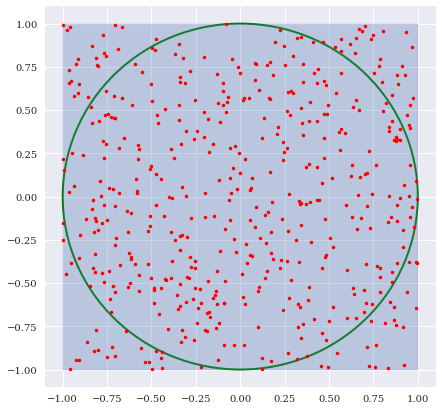

In [26]:
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(1, 1, 1)

circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0,
                  facecolor='None')  

box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)  

ax.add_patch(circ)  
ax.add_patch(box)  
plt.plot(rn[:, 0], rn[:, 1], 'r.')  
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)
# plt.savefig('../../images/ch10/perf_01.png');

In [39]:
n = int(1e7)

In [28]:
%time rn = np.random.random((n, 2)) * 2 - 1

Wall time: 489 ms


In [29]:
rn.nbytes

160000000

In [30]:
%time distance = np.sqrt((rn ** 2).sum(axis=1))  
distance[:8].round(3)

Wall time: 366 ms


array([0.926, 0.879, 0.24 , 0.903, 0.685, 0.911, 0.318, 0.177])

In [31]:
%time frac = (distance <= 1.0).sum() / len(distance)  

Wall time: 30 ms


In [32]:
pi_mcs = frac * 4  
pi_mcs  

3.1415564

In [33]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [34]:
%time mcs_pi_py(n)

Wall time: 9.37 s


3.1413632

In [35]:
mcs_pi_nb = numba.jit(mcs_pi_py)

In [36]:
%time mcs_pi_nb(n)

Wall time: 630 ms


3.1416688

In [37]:
%time mcs_pi_nb(n)

Wall time: 234 ms


3.1405428

In [ ]:
%%cython -a
import random
def mcs_pi_cy1(int n):
    cdef int i, circle = 0
    cdef float x, y
    for i in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [ ]:
%time mcs_pi_cy1(n)

In [ ]:
%%cython -a
from libc.stdlib cimport rand
cdef extern from 'limits.h':
    int INT_MAX
def mcs_pi_cy2(int n):
    cdef int i, circle = 0
    cdef float x, y
    for i in range(n):
        x, y = rand() / INT_MAX, rand() / INT_MAX
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [ ]:
%time mcs_pi_cy2(n)

## Binomial Trees

### Python

In [40]:
import math

In [41]:
S0 = 36.  
T = 1.0  
r = 0.06  
sigma = 0.2  

In [42]:
def simulate_tree(M):
    dt = T / M  
    u = math.exp(sigma * math.sqrt(dt))  
    d = 1 / u  
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return S

In [43]:
np.set_printoptions?

In [44]:
np.set_printoptions(formatter={'float':
                               lambda x: '%6.2f' % x})  

In [45]:
simulate_tree(4)  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [46]:
%time simulate_tree(500)  

Wall time: 192 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

### NumPy

In [47]:
M = 4

In [48]:
up = np.arange(M + 1)
up = np.resize(up, (M + 1, M + 1))  
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [49]:
down = up.T * 2  
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [50]:
up - down  

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [51]:
dt = T / M

In [52]:
S0 * np.exp(sigma * math.sqrt(dt) * (up - down))  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [53]:
def simulate_tree_np(M):
    dt = T / M
    up = np.arange(M + 1)
    up = np.resize(up, (M + 1, M + 1))
    down = up.transpose() * 2
    S = S0 * np.exp(sigma * math.sqrt(dt) * (up - down))
    return S

In [54]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [66]:
%time simulate_tree_np(500)

Wall time: 12 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

### Numba

In [67]:
simulate_tree_nb = numba.jit(simulate_tree)

In [68]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [78]:
%time simulate_tree_nb(500)

Wall time: 999 µs


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [79]:
%timeit simulate_tree_nb(500)

1.08 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Cython

In [ ]:
%%cython -a
import numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
def simulate_tree_cy(int M):
    cdef int z, t, i
    cdef float dt, u, d
    cdef float[:, :] S = np.zeros((M + 1, M + 1),
                                  dtype=np.float32)  
    dt = T / M
    u = exp(sigma * sqrt(dt))
    d = 1 / u
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return np.array(S)

In [ ]:
simulate_tree_cy(4)

In [ ]:
%time simulate_tree_cy(500)

In [ ]:
%timeit S = simulate_tree_cy(500)

## Monte Carlo Simulation

### Python

In [80]:
M = 100  
I = 50000  

In [81]:
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)  
    for t in range(1, M + 1):  
        for i in range(I):  
            S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt +
                                         sigma * math.sqrt(dt) * rn[t, i])  
    return S      

In [82]:
%time S = mcs_simulation_py((M, I))

Wall time: 11.5 s


In [84]:
S

array([[ 36.00,  36.00,  36.00, ...,  36.00,  36.00,  36.00],
       [ 36.34,  36.98,  35.39, ...,  36.81,  34.96,  36.64],
       [ 36.11,  36.78,  35.49, ...,  37.65,  34.33,  37.14],
       ...,
       [ 57.33,  38.38,  43.04, ...,  36.58,  35.03,  40.69],
       [ 57.51,  39.57,  42.16, ...,  36.20,  34.70,  39.62],
       [ 55.89,  38.99,  42.64, ...,  36.35,  34.48,  40.01]])

In [85]:
S[-1].mean()  

38.13298391866131

In [86]:
S0 * math.exp(r * T)  

38.22611567563295

In [87]:
K = 40.  

In [88]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()  

In [89]:
C0  #  <8>

3.8855360254339826

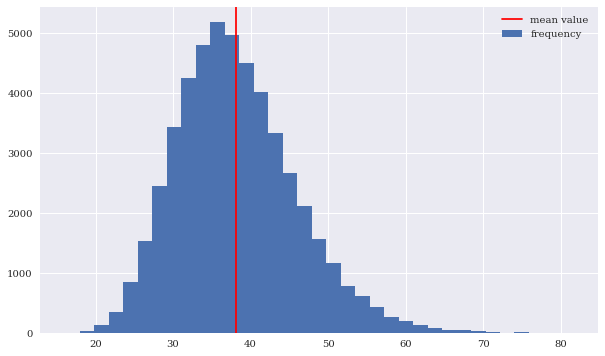

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=35, label='frequency')
plt.axvline(S[-1].mean(), color='r', label='mean value')
plt.legend(loc=0)
# plt.savefig('../../images/ch10/perf_02.png');

### NumPy

In [91]:
def mcs_simulation_np(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):  
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt +
                               sigma * math.sqrt(dt) * rn[t]) 
    return S      

In [92]:
%time S = mcs_simulation_np((M, I))

Wall time: 331 ms


In [93]:
S[-1].mean()

38.20252967224342

In [94]:
%timeit S = mcs_simulation_np((M, I))

293 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Numba 

In [95]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

In [96]:
%time S = mcs_simulation_nb((M, I))  

Wall time: 823 ms


In [97]:
%time S = mcs_simulation_nb((M, I))  

Wall time: 263 ms


In [98]:
S[-1].mean()

38.237851259304016

In [99]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()

In [100]:
C0

3.8378282328485236

In [101]:
%timeit S = mcs_simulation_nb((M, I))  

275 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Cython &mdash; Sequential

In [ ]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
@cython.boundscheck(False)
@cython.wraparound(False)
def mcs_simulation_cy(p):
    cdef int M, I
    M, I = p
    cdef int t, i
    cdef float dt = T / M
    cdef double[:, :] S = np.zeros((M + 1, I))
    cdef double[:, :] rn = np.random.standard_normal((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * exp((r - sigma ** 2 / 2) * dt +
                                         sigma * sqrt(dt) * rn[t, i])
    return np.array(S) 

In [ ]:
%time S = mcs_simulation_cy((M, I))

In [ ]:
S[-1].mean()

In [ ]:
%timeit S = mcs_simulation_cy((M, I))

### Multiprocessing

In [102]:
import multiprocessing as mp

In [103]:
pool = mp.Pool(processes=4)  

In [104]:
p = 20  

In [ ]:
%timeit S = np.hstack(pool.map(mcs_simulation_np, p * [(M, int(I / p))]))

In [ ]:
%timeit S = np.hstack(pool.map(mcs_simulation_nb, p * [(M, int(I / p))]))

In [ ]:
%timeit S = np.hstack(pool.map(mcs_simulation_cy, p * [(M, int(I / p))]))

## Recursive pandas Algorithm

### Data and Formula

In [1]:
import pandas as pd

In [2]:
sym = 'SPY'

In [3]:
data = pd.DataFrame(pd.read_csv('tr_eikon_eod_data.csv',
                               index_col=0, parse_dates=True)[sym]).dropna()

In [4]:
data

,SPY
Date,
2010-01-04,113.33
2010-01-05,113.63
2010-01-06,113.71
2010-01-07,114.19
2010-01-08,114.57
...,...
2018-06-25,271.00
2018-06-26,271.60
2018-06-27,269.35


In [11]:
alpha = 0.25

In [5]:
data['EWMA'] = data[sym]  

In [9]:
data

,SPY,EWMA
Date,,
2010-01-04,113.33,113.33
2010-01-05,113.63,113.63
2010-01-06,113.71,113.71
2010-01-07,114.19,114.19
2010-01-08,114.57,114.57
...,...,...
2018-06-25,271.00,271.00
2018-06-26,271.60,271.60
2018-06-27,269.35,269.35


In [6]:
data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2138, freq=None)

In [7]:
data.index[1:]

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
               '2010-01-15', '2010-01-19',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2137, freq=None)

In [8]:
list(zip(data.index, data.index[1:]))

[(Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-05 00:00:00')),
 (Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-06 00:00:00')),
 (Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-07 00:00:00')),
 (Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-08 00:00:00')),
 (Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-11 00:00:00')),
 (Timestamp('2010-01-11 00:00:00'), Timestamp('2010-01-12 00:00:00')),
 (Timestamp('2010-01-12 00:00:00'), Timestamp('2010-01-13 00:00:00')),
 (Timestamp('2010-01-13 00:00:00'), Timestamp('2010-01-14 00:00:00')),
 (Timestamp('2010-01-14 00:00:00'), Timestamp('2010-01-15 00:00:00')),
 (Timestamp('2010-01-15 00:00:00'), Timestamp('2010-01-19 00:00:00')),
 (Timestamp('2010-01-19 00:00:00'), Timestamp('2010-01-20 00:00:00')),
 (Timestamp('2010-01-20 00:00:00'), Timestamp('2010-01-21 00:00:00')),
 (Timestamp('2010-01-21 00:00:00'), Timestamp('2010-01-22 00:00:00')),
 (Timestamp('2010-01-22 00:00:00'), Timestamp('2010-01-25 00:00:00')),
 (Time

In [12]:
%%time
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha * data.loc[t[1], sym] +
                              (1 - alpha) * data.loc[t[0], 'EWMA'])  

Wall time: 646 ms


In [13]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.330000
2010-01-05,113.63,113.405000
2010-01-06,113.71,113.481250
2010-01-07,114.19,113.658438
2010-01-08,114.57,113.886328


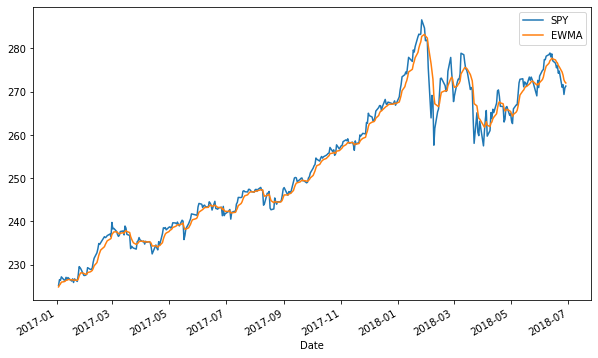

In [14]:
data[data.index > '2017-1-1'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch10/perf_03.png');

### Pure Python

In [15]:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]
    return y

In [18]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)  

Wall time: 74 ms


In [19]:
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)  

Wall time: 4 ms


In [20]:
data

,SPY,EWMA,EWMA_PY
Date,,,
2010-01-04,113.33,113.330000,113.330000
2010-01-05,113.63,113.405000,113.405000
2010-01-06,113.71,113.481250,113.481250
2010-01-07,114.19,113.658438,113.658438
2010-01-08,114.57,113.886328,113.886328
...,...,...,...
2018-06-25,271.00,274.535176,274.535176
2018-06-26,271.60,273.801382,273.801382
2018-06-27,269.35,272.688537,272.688537


### Numba

In [23]:
ewma_nb = numba.jit(ewma_py)

In [25]:
%time data['EWMA_NB'] = ewma_nb(data[sym], alpha)  

Wall time: 76 ms


In [26]:
%timeit data['EWMA_NB'] = ewma_nb(data[sym], alpha)  

63.1 ms ± 370 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%time data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

Wall time: 168 ms


In [28]:
%timeit data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

132 µs ± 2.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Cython

In [31]:
%%cython
import numpy as np
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)
def ewma_cy(double[:] x, float alpha):
    cdef int i
    cdef double[:] y = np.empty_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i - 1]
    return y

In [32]:
%time data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

NameError: name 'ewma_cy' is not defined

In [33]:
%timeit data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

NameError: name 'ewma_cy' is not defined

In [34]:
data.head()

,SPY,EWMA,EWMA_PY,EWMA_NB
Date,,,,
2010-01-04,113.33,113.330000,113.330000,113.330000
2010-01-05,113.63,113.405000,113.405000,113.405000
2010-01-06,113.71,113.481250,113.481250,113.481250
2010-01-07,114.19,113.658438,113.658438,113.658438
2010-01-08,114.57,113.886328,113.886328,113.886328


In [35]:
data.tail()

,SPY,EWMA,EWMA_PY,EWMA_NB
Date,,,,
2018-06-25,271.00,274.535176,274.535176,274.535176
2018-06-26,271.60,273.801382,273.801382,273.801382
2018-06-27,269.35,272.688537,272.688537,272.688537
2018-06-28,270.89,272.238903,272.238903,272.238903
2018-06-29,271.28,271.999177,271.999177,271.999177


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>